# Twitter Stock Sentiment Analysis Project

## Project Objectives
This project aims analyze stock market sentiments from Twitter tweets using machine learning techniques. I want to explore if the sentiment surrounding these stocks could have an impact on the performance of the stocks in the stock market.

In [46]:
# All of our imports
import pandas as pd

In [47]:
# Importing the training data
training_data = pd.read_csv('Data/trainingData/final_data.csv')
training_data = training_data.iloc[: , 1:]
training_data

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
13965,"$SBUX down PM, from $DB downgrade.. PT shorten...",0
13966,Finnish developer and manufacturer of mobile p...,0
13967,Operating profit savage to EUR 38.1 mn from EU...,0
13968,HSBC articulate Unit to Book $585 Million Char...,0


## Analyzing the composition of the training data
It is important to analyze the composition of the training data in order to identify any potential class imbalances (between positive and negative sentiments for example). 

Class Distribution:
Sentiment
1    8262
0    5708
Name: count, dtype: int64


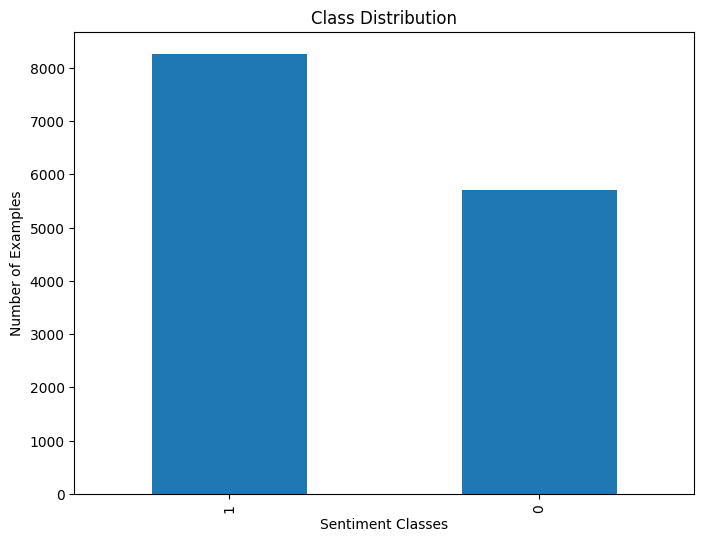

In [48]:
import matplotlib.pyplot as plt

# Check the class distribution
label_counts = training_data['Sentiment'].value_counts()

# Print the counts
print("Class Distribution:")
print(label_counts)

# Visualizing the class distribution
label_counts.plot(kind='bar', title='Class Distribution', figsize=(8, 6))
plt.xlabel('Sentiment Classes')
plt.ylabel('Number of Examples')
plt.show()

From the visualization it can be seen that although the classes are not exactly equally distributed, the difference is still relatively mild, and thus the training data is suitable to proceed.

In [49]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

X = training_data['Text']  
y = training_data['Sentiment']  

# Stratifying to ensure that the training and testing data contains both classes in the same ratio as the original dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Text vectorization
Text vectorization converts text data into a vector of numbers with different sizes based on the size of the vocabulary.
We also consider unigrams and bigrams while removing common english stop words from the text

In [50]:
# Making a vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

# Making a vectorizer with a 5000 word vocabulary and that considers unigrams and bigrams
vectorizer = TfidfVectorizer(
    max_features=5000,        
    ngram_range=(1, 2),
    stop_words='english'      # Remove common English stop words
)

# Tranforming the training and testing data
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [51]:
# Defining the models that we will use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

/Users/aadeesh/miniconda3/envs/titanic/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt


# Training the models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_transformed, y_train)

In [53]:
# Dictionary to store metrics
metrics = []

# Predict on the test set
for model_name, model in models.items():
    y_pred = model.predict(X_test_transformed)
    
    # Calculate evaluation metrics
    metric_data = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }
    metrics.append(metric_data)
    # Convert metrics to a DataFrame for easy comparison
metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.set_index("Model")
metrics_df.sort_values(by="F1-Score", ascending=False, inplace=True)
metrics_df

,Accuracy,Precision,Recall,F1-Score
Model,,,,
Support Vector Machine,0.810666,0.809650,0.810666,0.809416
Logistic Regression,0.803508,0.804365,0.803508,0.799911
XGBoost,0.765211,0.773179,0.765211,0.754867


## Model Selection
Since the best perfoming model was the SVM, we will use SVM to predict the sentiment scores of over 80k+ tweets

I will first import the dataset and then clean/preprocess it before making our predictions.


In [54]:
# Load the dataset
tweetsData = pd.read_csv("Data/stockTweets.csv")  # Replace with your dataset file path
tweetsData

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


In [55]:
import re

def preprocess_tweet(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r"@\w+|#\w+", "", text)
    # Remove emojis
    text = re.sub(r"[^\w\s,]", "", text)
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply preprocessing to the Tweet column
tweetsData['Cleaned_Tweet'] = tweetsData['Tweet'].apply(preprocess_tweet)
tweetsData


,Date,Tweet,Stock Name,Company Name,Cleaned_Tweet
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",mainstream media has done an amazing job at br...
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",tesla delivery estimates are at around k from ...
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.","even if i include m unvested rsus as of , addi..."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",hahaha why are you still trying to stop tesla ...
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.","stop trying to kill kids, you sad deranged old..."
...,...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,some of the fastest growing tech stocks on the...
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,"with earnings on the horizon, here is a quick ..."
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,our record delivery results are a testimony of...
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,"we delivered , smart evs in sep , reaching the..."


In [56]:
# Transforming the tweet data using the same TF_IDF vectorizer
transformedTweets = vectorizer.transform(tweetsData['Cleaned_Tweet'])  
transformedTweets

<80793x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 745363 stored elements in Compressed Sparse Row format>

In [57]:
# Making our predictions on the data using our SVM model

svm_model = models["Support Vector Machine"]
sentiment_scores = svm_model.predict(transformedTweets)
tweetsData["Sentiment"] = sentiment_scores
tweetsData.head(10)

,Date,Tweet,Stock Name,Company Name,Cleaned_Tweet,Sentiment
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",mainstream media has done an amazing job at br...,1
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",tesla delivery estimates are at around k from ...,0
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.","even if i include m unvested rsus as of , addi...",1
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",hahaha why are you still trying to stop tesla ...,1
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.","stop trying to kill kids, you sad deranged old...",1
5,2022-09-29 22:25:53+00:00,@RealDanODowd @Tesla This is you https://t.co/...,TSLA,"Tesla, Inc.",this is you,1
6,2022-09-29 22:24:22+00:00,For years @WholeMarsBlog viciously silenced @T...,TSLA,"Tesla, Inc.",for years viciously silenced critics failing t...,1
7,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,TSLA,"Tesla, Inc.",nio just because im down money doesnt mean thi...,1
8,2022-09-29 22:23:28+00:00,50 likes for some $SPY $TSLA charts to study!\...,TSLA,"Tesla, Inc.",likes for some spy tsla charts to study,0
9,2022-09-29 22:15:01+00:00,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,TSLA,"Tesla, Inc.","the powerwalls themselves are waterproof, but ...",0


In [58]:
# Load the stock price dataset
stock_data = pd.read_csv("Data/financeData.csv")

# Filtering by tech stocks and converting date to datetime format
tech_stocks = ['TSLA', 'MSFT', 'META', 'AMZN', 'GOOG', 'AMD', 'AAPL', 'NFLX']
tech_stock_data = stock_data[stock_data['Stock Name'].isin(tech_stocks)]
tech_stock_data['Date'] = pd.to_datetime(tech_stock_data['Date'])

tech_stock_data


/var/folders/l7/h15d3n8j2dq3nvmv6kg65qyc0000gn/T/ipykernel_93768/2361214822.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_stock_data['Date'] = pd.to_datetime(tech_stock_data['Date'])


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA
...,...,...,...,...,...,...,...,...
2263,2022-09-23,235.139999,236.449997,221.429993,226.410004,226.410004,11207200,NFLX
2264,2022-09-26,225.600006,232.699997,223.009995,224.070007,224.070007,8234300,NFLX
2265,2022-09-27,228.630005,230.639999,220.720001,224.360001,224.360001,7762200,NFLX
2266,2022-09-28,229.690002,246.649994,227.380005,245.199997,245.199997,17579700,NFLX
